# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.

\begin{align}
&\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right) \\
&\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
\end{align}

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

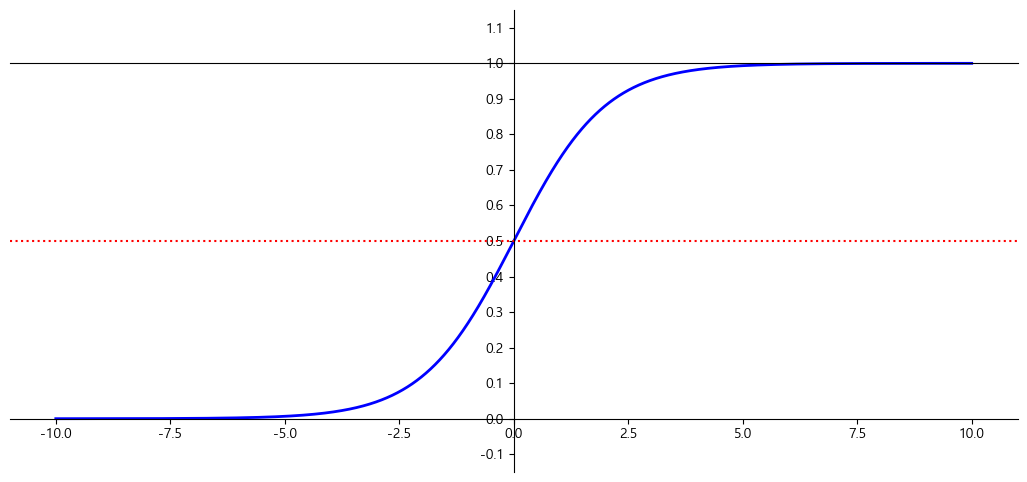

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 10000) 
y = logistic_func(X)

plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

# y 위치에 수평선을 그리는 함수.
# x 위치에 수직선을 그리는 함수(axvline(x=위치))
plt.axhline(y=0.5, color='r', linestyle=':')

plt.ylim(-0.15, 1.15) # y축 범위 지정.
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca()
ax.spines['left'].set_position("center")      # spine의 위치를 변경. - 상수
ax.spines['bottom'].set_position(('data', 0)) # 위치 변경 - 이동시킬 위치 값을 지정.
ax.spines['top'].set_position(("data", 1)) 
ax.spines['right'].set_visible(False)         # spine을 안보이게 처리.
plt.show()

## LogisticRegression의 손실 함수(Loss Function)
- **로그 손실함수(log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
-\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - 2진 분류용 Log loss 함수
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 유도한 함수.
\begin{align}
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
\end{align}

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(10,8))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])

plt.xlabel("모델이 정답에 대해 예측한 확률값")
plt.ylabel("오차")

plt.gca().spines['bottom'].set_position(("data", 0))
plt.show()

In [ ]:
-np.log(1), -np.log(0.500001)

In [ ]:
-np.log(0.49999), -np.log(0.1), -np.log(0.01), -np.log(0.000000001)

## LogisticRegression 모델 최적화 

- 분류 문제이므로 binary cross-entropy를 손실함수로 사용하여 **gradient descent(경사하강법)** 을 이용해 모델을 최적화한다.

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : gradient descent의 반복횟수

## 예제

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()), ("model", LogisticRegression(random_state=0))
])

pipeline.fit(X_train, y_train)

In [ ]:
pipeline.steps[1][1]

In [ ]:
## LR - weight와 bias 를 조회
pipeline.steps[1][1].coef_

In [ ]:
pipeline.steps[1][1].intercept_

In [ ]:
# 평가
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

pred_train_proba = pipeline.predict_proba(X_train)
pred_test_proba = pipeline.predict_proba(X_test)

In [ ]:
pred_test[:5]

In [ ]:
pred_test_proba[:5]

In [ ]:
from metrics import print_binary_classification_metrics
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])

In [ ]:
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty":['l1', 'l2']
}
gs = GridSearchCV(
    pipeline,
    params,
    scoring="accuracy", 
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score')